<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Plotting (Good)</span></div>

# What to expect in this chapter

different way of speaking to Matplotlib
- ‘dialect’ we have used to talk to Matplotlib is called the Matlab-like pyplot(plt)
- use Object Oriented (OO) interface (manipulate the various axes easily)

# 1 Some nomenclature

Matplotlib figure:
-  full canvas you use to draw stuff on
Matplotlib axis:
- individual mathematical axes we use for plotting
- use twinx() to create more axes

# 2 Comparing the two ‘dialects’

### pyplot Interface

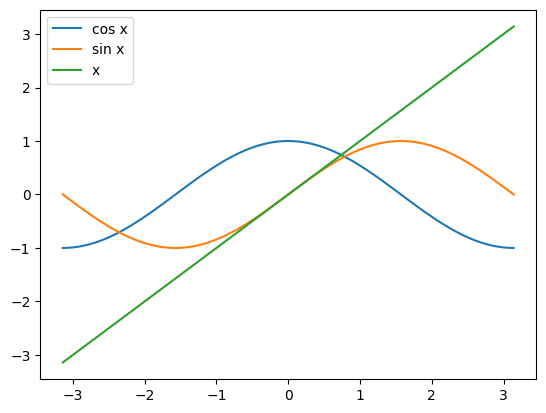

In [11]:
x = np.linspace(-np.pi, np.pi, num=100)
cos_x = np.cos(x)
sin_x = np.sin(x)


from matplotlib import pyplot as plt
import numpy as np
plt.plot(x, cos_x, label='cos x')
plt.plot(x, sin_x, label='sin x')
plt.plot(x, x, label='x')
plt.legend()

### OO Interface

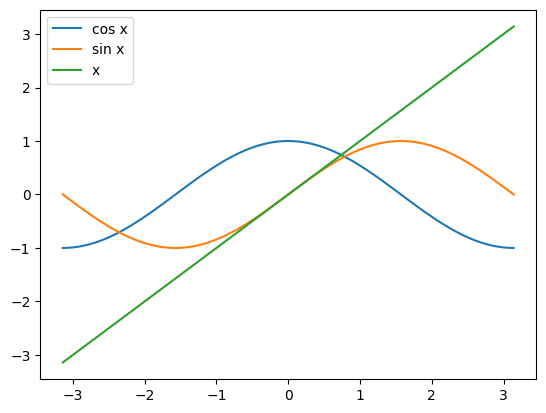

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=1) #create a figure and an axis, one column, one cow
ax.plot(x, cos_x, label='cos x')
ax.plot(x, sin_x, label='sin x')
ax.plot(x , x, label='x')
ax.legend()

# 3 What is OO ax, really?

<class 'numpy.ndarray'>
(3,)
<class 'matplotlib.axes._axes.Axes'>


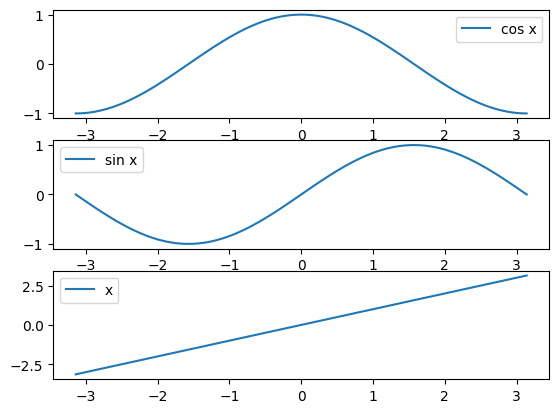

In [14]:
fig, ax = plt.subplots(nrows=3, ncols=1) #give two rows so three planes to plot on 

ax[0].plot(x, cos_x, label='cos x') #ax is a numpy array
ax[1].plot(x, sin_x, label='sin x')
ax[2].plot(x, x, label='x')

ax[0].legend()
ax[1].legend()
ax[2].legend()
print(type(ax)) #ax is a array
print(ax.shape) #as has 3 things
print(type(ax[0])) #ax contains matplotlib axis

# 4 A complete OO example

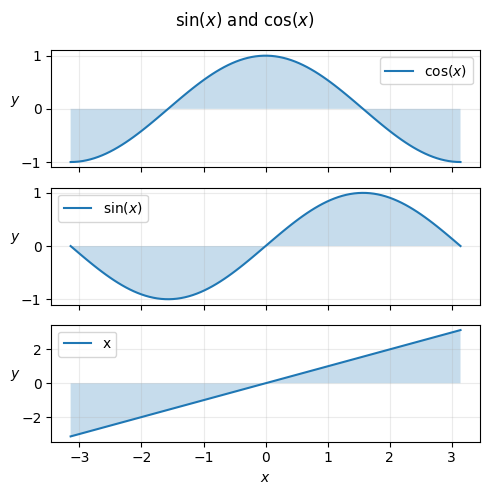

In [23]:
fig, ax = plt.subplots(nrows=3, ncols=1, #creating 3 planes (3 axis)
                       figsize=(5, 5),  #setting size
                       sharex=True) #share x-axis


ax[0].plot(x, cos_x, label=r'$\cos(x)$')
ax[0].fill_between(x, 0, cos_x, alpha=.25) #fill between 0 and cosx
ax[1].plot(x, sin_x, label=r'$\sin(x)$')
ax[1].fill_between(x, 0, sin_x, alpha=.25) #fill between o and sinx
ax[2].plot(x, x, label=r'x')
ax[2].fill_between(x, 0, x, alpha=0.25) #fill between 0 and x

for a in ax:
    a.legend() #setting legend
    a.grid(alpha=.25) #set grid lines
    a.set_ylabel('$y$', rotation=0) #so that y is upright


ax[2].set_xlabel('$x$') #only have one x axis so set lowest point, which is index 2

fig.suptitle(r'$\sin(x)$ and $\cos(x)$') #setting title to whole figure
fig.tight_layout() #adjusts the size of subplots and their positions

# 5 Multiple rows and columns

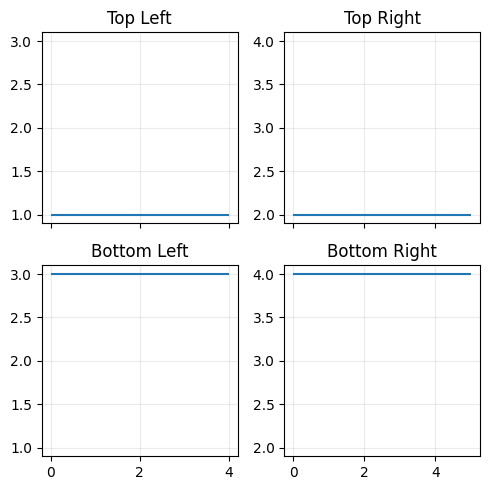

In [24]:
fig, ax = plt.subplots(nrows=2, ncols=2,
                       figsize=(5, 5),
                       sharex='col', sharey='col')

# Some variables to access the axes and improve readabilty
top_left, top_right, bottom_left, bottom_right = ax.flatten()

top_left.set_title('Top Left')
top_right.set_title('Top Right')
bottom_left.set_title('Bottom Left')
bottom_right.set_title('Bottom Right')

top_left.hlines(y=1, xmin=0, xmax=4)
top_right.hlines(y=2, xmin=0, xmax=5)
bottom_left.hlines(y=3, xmin=0, xmax=4)
bottom_right.hlines(y=4, xmin=0, xmax=5)

for a in ax.flatten():
    a.grid(alpha=.25)

plt.tight_layout()

### Using ax

(2, 2)


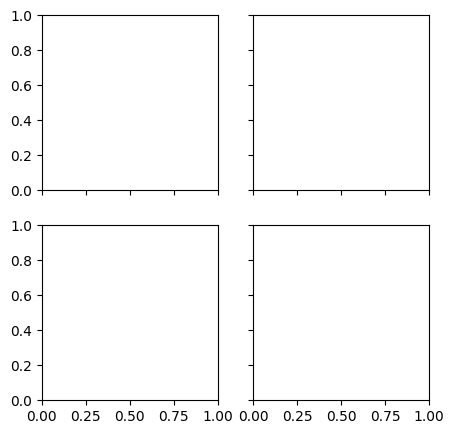

In [27]:
fig, ax = plt.subplots(nrows=2, ncols=2,
                       figsize=(5, 5),
                       sharex='col', sharey='row')
print(ax.shape) #2 by 2 array

In [28]:
ax[0, 0].set_title('Top Left') #access column 0 and row 0
ax[0, 1].set_title('Top Right')
ax[1, 0].set_title('Bottom Left')
ax[1, 1].set_title('Bottom Right')

Text(0.5, 1.0, 'Bottom Right')

**set variable**:

In [30]:
top_left=ax[0, 0]
top_right=ax[0, 1]
bottom_left=ax[1, 0]
bottom_right=ax[1, 1]

**or flatten**:

In [33]:
top_left, top_right, bottom_left, bottom_right = ax.flatten() #flatten 2d array into 1d array

**Drawing lines:**

In [39]:
top_left.hlines(y=1, xmin=0, xmax=4)
top_right.hlines(y=2, xmin=0, xmax=5)
bottom_left.hlines(y=3, xmin=0, xmax=4)
bottom_right.hlines(y=4, xmin=0, xmax=5)

## 5.1 Sharing axes

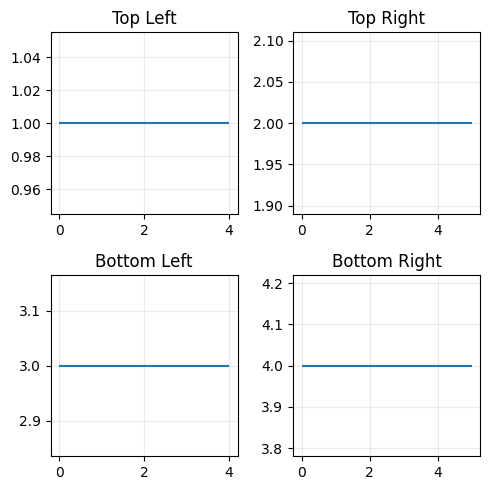

In [50]:
fig, ax = plt.subplots(nrows=2, ncols=2,
                       figsize=(5, 5)
                      )

# Some variables to access the axes and improve readabilty
top_left, top_right, bottom_left, bottom_right = ax.flatten()

top_left.set_title('Top Left')
top_right.set_title('Top Right')
bottom_left.set_title('Bottom Left')
bottom_right.set_title('Bottom Right')

top_left.hlines(y=1, xmin=0, xmax=4)
top_right.hlines(y=2, xmin=0, xmax=5)
bottom_left.hlines(y=3, xmin=0, xmax=4)
bottom_right.hlines(y=4, xmin=0, xmax=5)

for a in ax.flatten():
    a.grid(alpha=.25)

plt.tight_layout()

Both axis auto-scaled. 
- plots on the left go from 0 to 4, and those on the right go from 0 to 5

To share axis:

| Option | Result                                 |
|:------:|----------------------------------------|
|  True  | Makes all the axes use the same range. |
|   col  | Use the same range for all the columns |
|   row  | Use the same range for all the rows    |

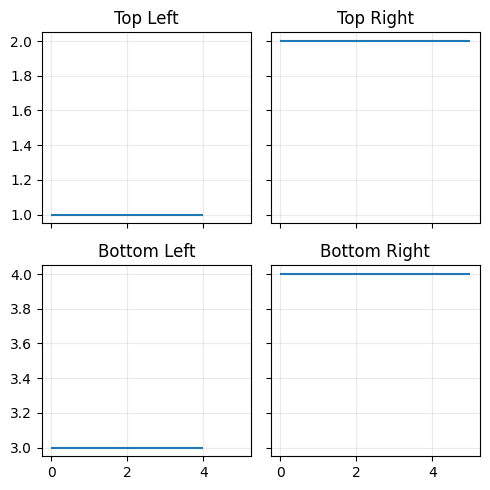

In [49]:
fig, ax = plt.subplots(
    nrows=2, ncols=2,
    figsize=(5, 5),
    sharex=True, sharey='row' #same range for x axis
)
top_left, top_right, bottom_left, bottom_right = ax.flatten()

top_left.set_title('Top Left')
top_right.set_title('Top Right')
bottom_left.set_title('Bottom Left')
bottom_right.set_title('Bottom Right')

top_left.hlines(y=1, xmin=0, xmax=4)
top_right.hlines(y=2, xmin=0, xmax=5)
bottom_left.hlines(y=3, xmin=0, xmax=4)
bottom_right.hlines(y=4, xmin=0, xmax=5)

for a in ax.flatten():
    a.grid(alpha=.25)

plt.tight_layout()

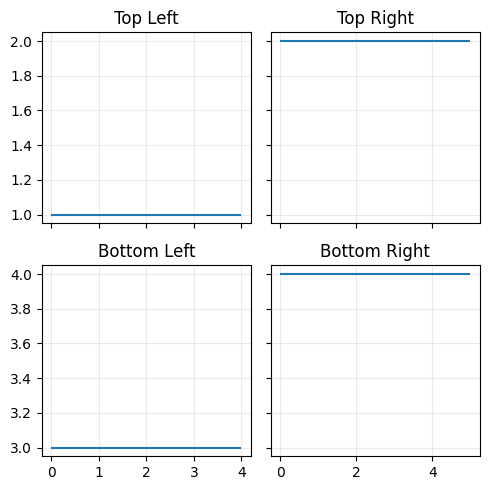

In [51]:
fig, ax = plt.subplots(
    nrows=2, ncols=2,
    figsize=(5, 5),
    sharex='col', sharey='row'
)
top_left, top_right, bottom_left, bottom_right = ax.flatten()

top_left.set_title('Top Left')
top_right.set_title('Top Right')
bottom_left.set_title('Bottom Left')
bottom_right.set_title('Bottom Right')

top_left.hlines(y=1, xmin=0, xmax=4)
top_right.hlines(y=2, xmin=0, xmax=5)
bottom_left.hlines(y=3, xmin=0, xmax=4)
bottom_right.hlines(y=4, xmin=0, xmax=5)

for a in ax.flatten():
    a.grid(alpha=.25)

plt.tight_layout()

## 5.2 Accessing all axes

apply changes to all axis:

In [52]:
top_left.grid(alpha=.25)
top_right.grid(alpha=.25)
bottom_left.grid(alpha=.25)
bottom_right.grid(alpha=.25)

In [53]:
for a in ax.flatten():
    a.grid(alpha=.25)

# 6 Other useful plots

## 6.1 Histograms

Showing distribution of data:

### A quick helper function

In [54]:
def get_plot_data():
    data = {} #empty dictionary
    #assingn data to the key: all
    filename = 'sg-gov-graduate-employment-survey_basic_monthly_mean_all.csv'
    data['All'] = np.loadtxt(filename, skiprows=1) #load csv file into np array, skip row since first row not relavant

    #assign data to key: NUS
    filename = 'sg-gov-graduate-employment-survey_basic_monthly_mean_nus.csv'
    data['NUS'] = np.loadtxt(filename, skiprows=1) #load csv file into np array, skip row since first row not relav

    return data

### The histogram

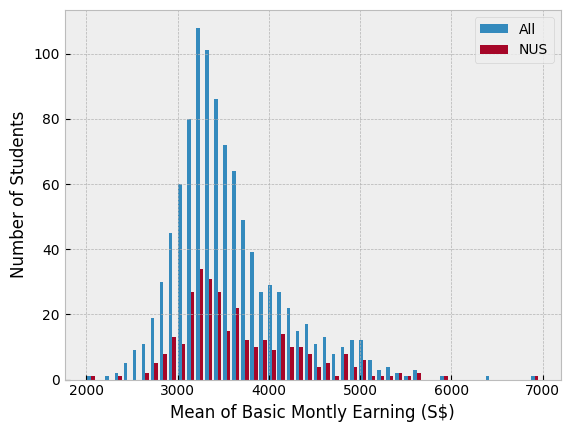

In [56]:
plt.style.use('bmh') #sets style
data = get_plot_data() #get data dictionary

# bins specifies how many bins to split the data
plt.hist([data['All'], data['NUS']], bins=50, label=['All', 'NUS']) #plots histogram for all and nus, label for legend
plt.xlabel('Mean of Basic Montly Earning (S$)') #labelling axis
plt.ylabel('Number of Students')
plt.legend() #display legend

## 6.2 Scatter plots

created by putting a marker at an point you specify (x,y).
Need some values for x so use range() along with len() to generate a list [0,1,2...] appropriate to the dataset

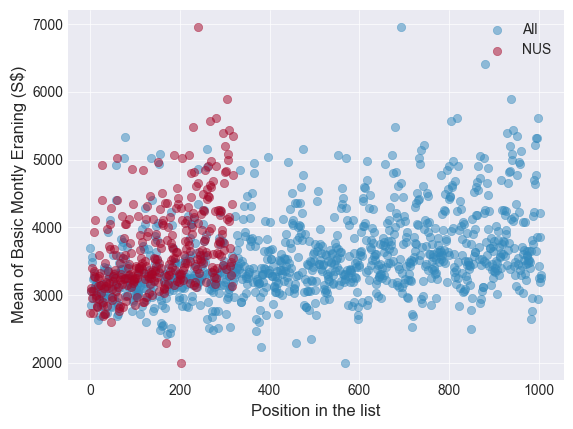

In [61]:
plt.style.use("seaborn-v0_8-darkgrid") #setting style

data = get_plot_data()

for label, numbers in data.items(): #for each key-value pair in data dictionary
    x = range(len(numbers)) 
    y = numbers
    plt.scatter(x, y, label=label, alpha=.5) #creating scatterplot

#example, if len(numbers) = 5
#range is [0,1,2,3,4]
#so when plotted will be: (0, y), (1, y), (2, y)...

plt.xlabel('Position in the list') #labelling axis
plt.ylabel('Mean of Basic Montly Eraning (S$)')
plt.legend() #setting legend

## 6.3 Bar charts

Text(0, 0.5, 'Number of Students')

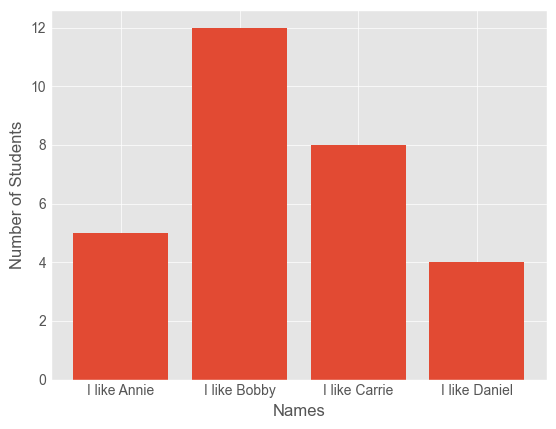

In [62]:
student_numbers = {'I like Annie': 5,
                   'I like Bobby': 12,
                   'I like Carrie': 8,
                   'I like Daniel': 4}
name = list(student_numbers.keys()) #extracts name
numbers = list(student_numbers.values()) #extracts numbers

plt.style.use('ggplot') #set style
plt.bar(name, numbers) #plotting
plt.xlabel('Names')
plt.ylabel('Number of Students')

## 6.4 Pie charts

Text(0.5, 1.0, 'Percentage of each major')

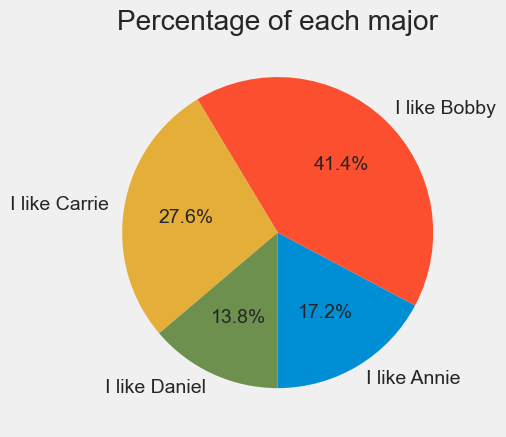

In [65]:
plt.style.use('fivethirtyeight') #set style
plt.pie(numbers, 
        labels=name,
        autopct='%1.1f%%',   # How to format the percentages
        startangle=-90        #set start angle, default is positive x axis
        )
plt.title('Percentage of each major')